In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv(r"Stocks\FB\cleaned_data\FB_2019-01-03_34200000_57600000_orderbook_10.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"], format='%Y-%m-%d %H:%M:%S:%f')
df.set_index(df["DateTime"], inplace=True)
df["Price"] = df["Price"]/10000
df = df.between_time('10:00', '15:30')
df.head()

,DateTime,Event_Type,Order_ID,Size,Price,Direction,Ask_Price_Level_1,Ask_Volume_Level_1,Bid_Price_Level_1,Bid_Volume_Level_1,...,Bid_Price_Level_8,Bid_Volume_Level_8,Ask_Price_Level_9,Ask_Volume_Level_9,Bid_Price_Level_9,Bid_Volume_Level_9,Ask_Price_Level_10,Ask_Volume_Level_10,Bid_Price_Level_10,Bid_Volume_Level_10
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-01-03 10:00:00.000176,2019-01-03 10:00:00.000176,1,50512070.0,10,134.59,1,134.68,1,134.63,1000,...,134.50,500,134.79,100,134.48,200,134.8,10,134.47,248
2019-01-03 10:00:00.000380,2019-01-03 10:00:00.000380,4,NaN,400,134.63,1,134.68,1,134.63,600,...,134.50,500,134.79,100,134.48,200,134.8,10,134.47,248
2019-01-03 10:00:00.000486,2019-01-03 10:00:00.000486,4,NaN,600,134.63,1,134.68,1,134.59,110,...,134.48,200,134.79,100,134.47,248,134.8,10,134.46,320
2019-01-03 10:00:00.000735,2019-01-03 10:00:00.000735,1,50512926.0,100,134.68,-1,134.68,101,134.59,110,...,134.48,200,134.79,100,134.47,248,134.8,10,134.46,320
2019-01-03 10:00:00.001044,2019-01-03 10:00:00.001044,3,50508214.0,100,134.48,1,134.68,101,134.59,110,...,134.48,100,134.79,100,134.47,248,134.8,10,134.46,320


In [22]:
df["Spread"] = df["Ask_Price_Level_1"] - df["Bid_Price_Level_1"]
df["Mid"] = (df["Ask_Price_Level_1"] - df["Bid_Price_Level_1"]) /2

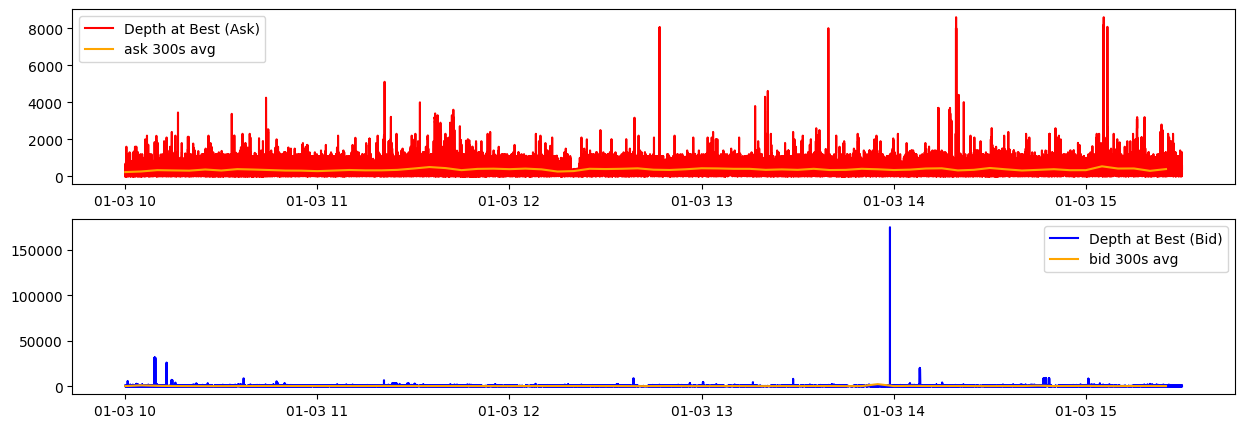

In [23]:
fig,ax = plt.subplots(2,1,figsize=(15,5))
window = 300

df["DoB_ask"] = df["Ask_Volume_Level_1"]
df["DoB_bid"] = df["Bid_Volume_Level_1"]
ax[0].plot(df["DoB_ask"],color="red",label = "Depth at Best (Ask)")
ax[1].plot(df["DoB_bid"],color="blue",label = "Depth at Best (Bid)")

ax[0].plot(df["DoB_ask"].resample(f"{window}s").mean(),color="orange",label=f"ask {window}s avg")
ax[1].plot(df["DoB_bid"].resample(f"{window}s").mean(),color="orange",label=f"bid {window}s avg")


ax[0].legend();ax[1].legend()


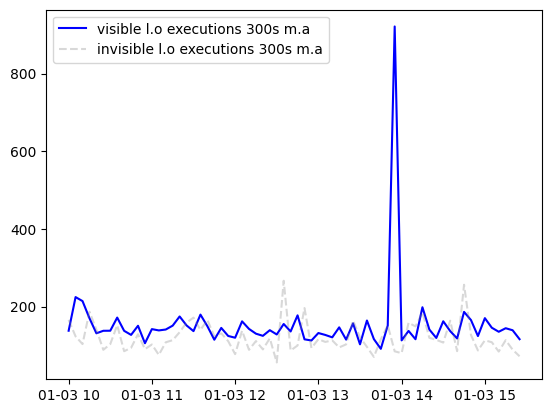

In [24]:
## Visible limit order exectuions

executions_vis = df[(df["Event_Type"]==4)]
executions_invis = df[(df["Event_Type"]==5)]
e_vis_ma = executions_vis["Size"].resample(f"{window}s").mean()
e_invis_ma = executions_invis["Size"].resample(f"{window}s").mean()

plt.plot(e_vis_ma,color="blue",label=f"visible l.o executions {window}s m.a")
plt.plot(e_invis_ma,linestyle="--",color="Gray",alpha=0.3,label=f"invisible l.o executions {window}s m.a")
plt.legend()

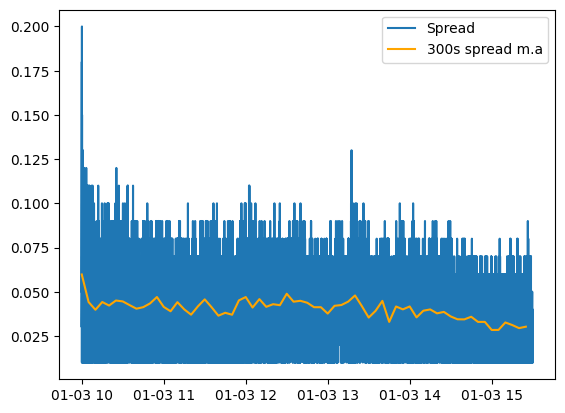

In [25]:
spread_ma = df["Spread"].resample(f"{window}s").mean()

plt.plot(df["Spread"],label="Spread")
plt.plot(spread_ma,color="orange",label=f"{window}s spread m.a")
plt.legend()

(array([2.83430e+04, 0.00000e+00, 6.73260e+04, 0.00000e+00, 0.00000e+00,
        1.22759e+05, 0.00000e+00, 1.35868e+05, 0.00000e+00, 0.00000e+00,
        1.08857e+05, 0.00000e+00, 0.00000e+00, 6.31450e+04, 0.00000e+00,
        2.96810e+04, 0.00000e+00, 0.00000e+00, 9.23600e+03, 0.00000e+00,
        0.00000e+00, 2.52000e+03, 0.00000e+00, 9.86000e+02, 0.00000e+00,
        0.00000e+00, 5.28000e+02, 0.00000e+00, 3.86000e+02, 0.00000e+00,
        0.00000e+00, 1.43000e+02, 0.00000e+00, 0.00000e+00, 9.10000e+01,
        0.00000e+00, 4.70000e+01, 0.00000e+00, 0.00000e+00, 4.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.01  , 0.0138, 0.0176, 0.0214, 0.0252, 0.029 , 0.0328, 0.0366,
        0.0404, 0.0442, 0.048 , 0.0518, 0.0556, 0.0594, 0.0632, 0.067 ,
        0.0708, 0.0746, 0.0784, 0.0822, 0.086 , 0.0898, 0.0936, 0.0974,
        0.1012, 0.105 , 0.1088, 0.1126, 0.1164, 0.12

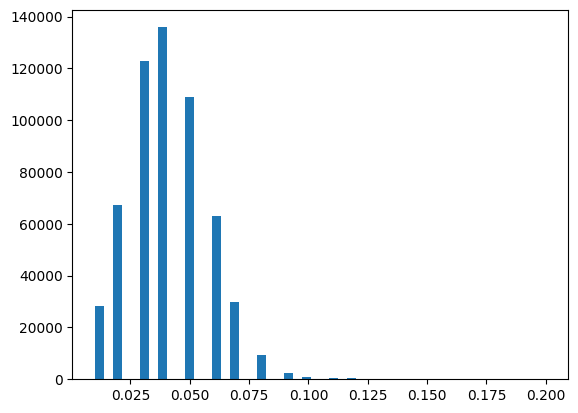

In [26]:
plt.hist(df["Spread"],bins=50)

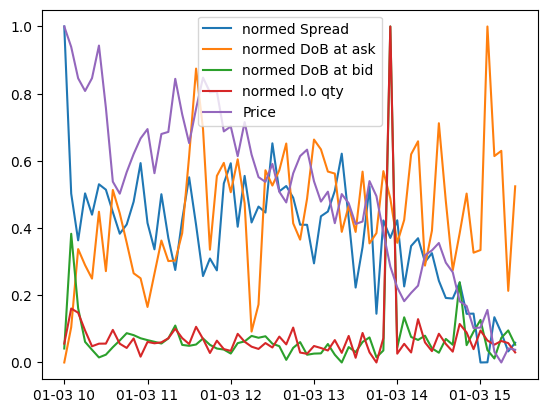

In [40]:
dob_a_ma = df["DoB_ask"].resample(f"{window}s").mean()
dob_b_ma = df["DoB_bid"].resample(f"{window}s").mean()
price_ma = df["Price"].resample(f"{window}s").mean()
z_spread = (spread_ma-spread_ma.min())/(spread_ma.max()-spread_ma.min())
z_dob_a = (dob_a_ma-dob_a_ma.min())/(dob_a_ma.max()-dob_a_ma.min())
z_dob_b = (dob_b_ma-dob_b_ma.min())/(dob_b_ma.max()-dob_b_ma.min())
z_e_vis = (e_vis_ma-e_vis_ma.min())/(e_vis_ma.max()-e_vis_ma.min())
z_price = (price_ma-price_ma.min())/(price_ma.max()-price_ma.min())
plt.plot(z_spread,label="normed Spread")
plt.plot(z_dob_a,label="normed DoB at ask")
plt.plot(z_dob_b,label="normed DoB at bid")
plt.plot(z_e_vis,label="normed l.o qty")
plt.plot(z_price,label="Price")
plt.legend()

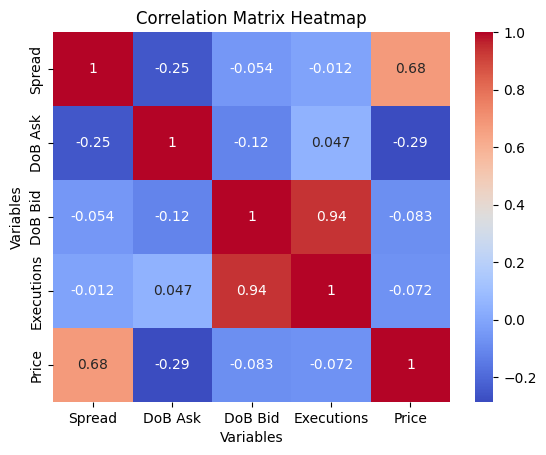

In [41]:
corr_matrix = np.corrcoef((z_spread,z_dob_a,z_dob_b,z_e_vis,price_ma))
ticks = ['Spread', 'DoB Ask', 'DoB Bid', 'Executions','Price']
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm" ,xticklabels=ticks,yticklabels=ticks)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Correlation Matrix Heatmap')
plt.show()